In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sympy import *

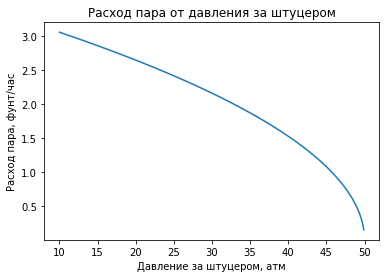

In [3]:
# w  =  расход пара, Ibm/hr lbm(фунт)=0,453592 кг
d0_mm=10  # диаметр отверстия
d1_mm=50 # диаметр трубы
dc_mm=5 # диаметр критического расходомера
C0 =2 # коэффициент разряда штуцера
Fa=0.000072 # коэффициент теплового расширения отверстия для стали нужно умножить 7.2*10^(-6) на изменение температуры
Y2=0.4 # коэффициент расширения пара
p1_atm=50 # давление перед отверстием
p2_atm=30 # давление в отверстии
p_atm=40 # давление между критическим и докритическим расходомером
# vexp_ft3lbm  двухфазный уд. объем пара при прохождении через штуцер
vfg_m3kg=57.8 # удельный объем пара
vf_m3kg=0.001# удельный объем жидкости
A=0.99998
B=1.38 # посчитал 1.38 все кэф рассчитаны приблизительно
a=37.037
b=0.345
k=1.3 # показатель адиабаты
p2_atm_a = np.arange(10,50,0.1)
def w_kghr(d0_mm, p2_atm):
    d0_in=d0_mm/25.4 #дюймы
    d1_in=d1_mm/25.4
    dc_in=dc_mm/25.4
    beta=d0_in/d1_in
    p1_psi=p1_atm*14.2233
    p2_psi=p2_atm*14.2233
    f_atm=p1_atm-p2_atm  # падение давления в отверстии
    f_psi=f_atm*14.2233
    p_psi=p_atm*14.2233
    vfg=vfg_m3kg/16.01845
    vf=vf_m3kg/16.01845
    K=(1888.56*C0*Fa*Y2)**2*(d0_in/dc_in)**4/(1-beta**4)
    P2_P1=p2_psi/p1_psi
    P2_P1_crit = (2 / (k + 1)) ** (k / (k - 1))  # критическое отношение давлений до и после штуцера
    X=100
    i=0
    while abs((X/100)**B-K/A*f_psi/p_psi**2*(X/100)**(2*b)/(vfg*a**2)+vf/(vfg*A)-0)>0.01 and i<10:
        F1=(X/100)**B-K/A*f_psi/p_psi**2*(X/100)**(2*b)/(vfg*a**2)+vf/(vfg*A)
        F2=B*(X/100)**(B-1)-2*b*K/A*f_psi/p_psi**2*(X/100)**(2*b-1)/(vfg*a**2)
        X=X-100*F1/F2
        i=i+1
    vexp_ft3lbm=A*vfg*(X/100)**B+vf
  #  if P2_P1 <= P2_P1_crit: 
 #       w_kghr=a*(d0_in)**2*p1_psi/(X/100)**b
 #   else: 
    w_kghr=1888.56*C0*Fa*Y2*d0_in**2*(f_psi/vexp_ft3lbm)**0.5/(1-beta**4)**0.5 # коэф 108000 пока придумал сам, чтобы перевести другие кэф
    return w_kghr
q=np.array([])
for pd in p2_atm_a:
    p1=w_kghr(d0_mm, pd)
    q=np.append(q,p1)
plt.plot(p2_atm_a,q)
plt.title('Расход пара от давления за штуцером')
plt.xlabel('Давление за штуцером, атм')
plt.ylabel('Расход пара, фунт/час')
plt.show()   

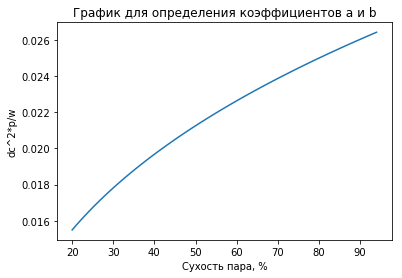

In [5]:
# код для проверки кэф а и b
# Расход пара только от 20, меньше лажа
X=20
a=37.037
b=0.345
X_a = np.arange(20,95,1)
def zxc(X):
    zxc=(X/100)**b/a
    return zxc
q=np.array([])
for pd in X_a:
    p1=zxc(pd)
    q=np.append(q,p1)
plt.plot(X_a,q)
plt.title('График для определения коэффициентов a и b')
plt.xlabel('Сухость пара, %')
plt.ylabel('dc^2*p/w')
plt.show()   

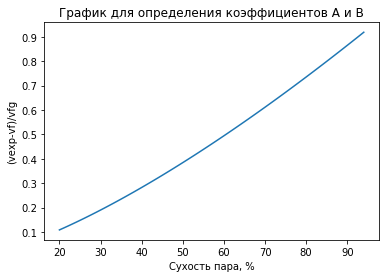

In [6]:
# код для проверки кэф A и B
# Расход пара только от 20, меньше лажа
X=20
A=0.99998
B=1.38
X_a = np.arange(20,95,1)
def zxc2(X):
    zxc2=A*(X/100)**B
    return zxc2
q=np.array([])
for pd in X_a:
    p1=zxc2(pd)
    q=np.append(q,p1)
plt.plot(X_a,q)
plt.title('График для определения коэффициентов A и B')
plt.xlabel('Сухость пара, %')
plt.ylabel('(vexp-vf)/vfg')
plt.show() 